<a href="https://colab.research.google.com/github/ProgKorn/Bayesian-Causal-Capstone/blob/main/BCIAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing of libraries and data

In [ ]:
!pip install mne
import mne
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
!pip install pyedflib
import pyedflib

# Locate data folder and all files
data_folder = '/content/drive/My Drive/Colab Notebooks/Depression Data' # change last folder to data set
edf_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.edf')]

print (edf_files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content/drive/My Drive/Colab Notebooks/Depression Data/6921143_H S15 EO.edf', '/content/drive/My Drive/Colab Notebooks/Depression Data/H S1 EO.edf', '/content/drive/My Drive/Colab Notebooks/Depression Data/H S10 EC.edf', '/content/drive/My Drive/Colab Notebooks/Depression Data/H S12 EO.edf', '/content/drive/My Drive/Colab Notebooks/Depression Data/H S11 EC.edf', '/content/drive/My Drive/Colab Notebooks/Depression Data/H S10 EO.edf', '/content/drive/My Drive/Colab Notebooks/Depression Data/H S11 EO.edf', '/content/drive/My Drive/Colab Notebooks/Depression Data/H S1 EC.edf', '/content/drive/My Drive/Colab Notebooks/Depression Data/H S11 TASK.edf', '/content/drive/My Drive/Colab Notebooks/Depression Data/H S1 TASK.edf', '/content/drive/My Drive/Colab Notebooks/Depression Data/6921959_H S15 EO.edf', '/content/drive/My Drive/Colab Notebooks/Depression Data/H S1

### Raw Features and Data for Classification

In [ ]:
# Initialise lists for feature and label storage
features = []
labels = []

# Iterate over EEG data files
for file in edf_files:
    # Read EEG data from file as check for valid files
    raw = mne.io.read_raw_edf(file, preload=True)

    # Extract signals and channels into an array form
    n_channels = len(raw.ch_names) # Get number of channels
    signal_lbl = raw.ch_names # Get channel labels
    signals = raw.get_data() # Get signal data as NumPy array
    raw.close()

    # Convert matrix into MNE raw object for processing
    meta = mne.create_info(ch_names=signal_lbl, sfreq=raw.info['sfreq'], ch_types='eeg')
    raw_object = mne.io.RawArray(signals, meta)
    print (meta)

    # Filter to extract Alpha (8 - 12 Hz)
    alpha_band = raw.copy().filter(l_freq=8, h_freq=12)

    # Filter to extract Beta (13 - 30 Hz)
    beta_band = raw.copy().filter(l_freq=13, h_freq=30)

    # Calculate power spectral density (PSD)
    psd_alpha = alpha_band.compute_psd(method='welch', tmin=10, tmax=20, fmin=0.5, fmax=30, picks=None)
    psd_beta = beta_band.compute_psd(method='welch', tmin=10, tmax=20, fmin=0.5, fmax=30, picks=None)
    psd_gen = raw.compute_psd(method='welch', tmin=10, tmax=20, fmin=0.5, fmax=30, picks=None)

    # Extract the PSD values as NumPy arrays
    psd_alpha_values = psd_alpha.get_data()
    psd_beta_values = psd_beta.get_data()
    psd_gen_values = psd_gen.get_data()

    # Append features and labels for algorithm
    features.append([np.mean(psd_alpha_values), np.mean(psd_beta_values), np.mean(psd_gen_values)])

    # Add label based on file name
    if 'MDD' in file:
        labels.append("Depressed") # Depressed MDD
    else:
        labels.append("Healthy") # Not Depressed H

# Convert to DataFrame for Algorithm
features_df = pd.DataFrame(features, columns=['Alpha PSD', 'Beta PSD', 'General PSD'])
labels_df = pd.DataFrame(labels, columns=['Label'])

labels = labels_df['Label'].values.ravel() # Convert to 1D array because the warning said to (ataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). return fit_method(estimator, args, *kwargs))

print(features_df)

print(labels_df)


Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/6921143_H S15 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S1 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 89855  =      0.000 ...   350.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=89856
    Range : 0 ... 89855 =      0.000 ...   350.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S10 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96255  =      0.000 ...   375.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=96256
    Range : 0 ... 96255 =      0.000 ...   375.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S12 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S11 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S11 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband atte

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S1 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S11 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=154880
    Range : 0 ... 154879 =      0.000 ...   604.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S1 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=154880
    Range : 0 ... 154879 =      0.000 ...   604.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/6921959_H S15 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S10 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=154880
    Range : 0 ... 154879 =      0.000 ...   604.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S12 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=154880
    Range : 0 ... 154879 =      0.000 ...   604.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S13 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S14 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155391  =      0.000 ...   606.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=155392
    Range : 0 ... 155391 =      0.000 ...   606.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S13 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77567  =      0.000 ...   302.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77568
    Range : 0 ... 77567 =      0.000 ...   302.996 secs


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156159  =      0.000 ...   609.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=156160
    Range : 0 ... 156159 =      0.000 ...   609.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB c

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S14 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 49663  =      0.000 ...   193.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=49664
    Range : 0 ... 49663 =      0.000 ...   193.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156159  =      0.000 ...   609.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=156160
    Range : 0 ... 156159 =      0.000 ...   609.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB c

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S15 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S14 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S19 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S17 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=154880
    Range : 0 ... 154879 =      0.000 ...   604.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S17 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 79103  =      0.000 ...   308.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=79104
    Range : 0 ... 79103 =      0.000 ...   308.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S18 EO.edf...
EDF file detected


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cuto

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S16 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76544
    Range : 0 ... 76543 =      0.000 ...   298.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S18 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155647  =      0.000 ...   607.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=155648
    Range : 0 ... 155647 =      0.000 ...   607.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S16 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 74751  =      0.000 ...   291.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=74752
    Range : 0 ... 74751 =      0.000 ...   291.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S17 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=22, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S16 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162303  =      0.000 ...   633.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=162304
    Range : 0 ... 162303 =      0.000 ...   633.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S2 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=154880
    Range : 0 ... 154879 =      0.000 ...   604.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S21 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 sampl

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S22 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S20 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 81919  =      0.000 ...   319.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=81920
    Range : 0 ... 81919 =      0.000 ...   319.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S21 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 78079  =      0.000 ...   304.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=78080
    Range : 0 ... 78079 =      0.000 ...   304.996 secs
Ready.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S19 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155647  =      0.000 ...   607.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=22, n_times=155648
    Range : 0 ... 155647 =      0.000 ...   607.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S2 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S19 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S2 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S20 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 78591  =      0.000 ...   306.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=78592
    Range : 0 ... 78591 =      0.000 ...   306.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S24 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76544
    Range : 0 ... 76543 =      0.000 ...   298.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S23 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S23 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158719  =      0.000 ...   619.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=158720
    Range : 0 ... 158719 =      0.000 ...   619.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S22 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=76544
    Range : 0 ... 76543 =      0.000 ...   298.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S24 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164863  =      0.000 ...   643.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=164864
    Range : 0 ... 164863 =      0.000 ...   643.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S22 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154623  =      0.000 ...   603.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=154624
    Range : 0 ... 154623 =      0.000 ...   603.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S23 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S24 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76031  =      0.000 ...   296.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76032
    Range : 0 ... 76031 =      0.000 ...   296.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S28 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband atte

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S25 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S26 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156415  =      0.000 ...   610.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=156416
    Range : 0 ... 156415 =      0.000 ...   610.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S27 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162047  =      0.000 ...   632.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=162048
    Range : 0 ... 162047 =      0.000 ...   632.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S27 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S26 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S25 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164607  =      0.000 ...   642.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=164608
    Range : 0 ... 164607 =      0.000 ...   642.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S26 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 78079  =      0.000 ...   304.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=78080
    Range : 0 ... 78079 =      0.000 ...   304.996 secs


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S27 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=154880
    Range : 0 ... 154879 =      0.000 ...   604.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S28 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155391  =      0.000 ...   606.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=155392
    Range : 0 ... 155391 =      0.000 ...   606.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S28 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=76544
    Range : 0 ... 76543 =      0.000 ...   298.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S3 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=154880
    Range : 0 ... 154879 =      0.000 ...   604.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S29 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77567  =      0.000 ...   302.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77568
    Range : 0 ... 77567 =      0.000 ...   302.996 secs
Ready.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S3 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S3 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 78079  =      0.000 ...   304.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=78080
    Range : 0 ... 78079 =      0.000 ...   304.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S29 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 sampl

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S6 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S5 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156671  =      0.000 ...   611.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=156672
    Range : 0 ... 156671 =      0.000 ...   611.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S4 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S5 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77567  =      0.000 ...   302.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=77568
    Range : 0 ... 77567 =      0.000 ...   302.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S5 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 79871  =      0.000 ...   311.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=79872
    Range : 0 ... 79871 =      0.000 ...   311.996 secs
Ready.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S4 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=22, n_times=154880
    Range : 0 ... 154879 =      0.000 ...   604.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S4 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 75519  =      0.000 ...   294.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=75520
    Range : 0 ... 75519 =      0.000 ...   294.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S7 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=154880
    Range : 0 ... 154879 =      0.000 ...   604.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S8 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155903  =      0.000 ...   608.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=155904
    Range : 0 ... 155903 =      0.000 ...   608.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S7 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77567  =      0.000 ...   302.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=77568
    Range : 0 ... 77567 =      0.000 ...   302.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S8 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S6 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156415  =      0.000 ...   610.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=156416
    Range : 0 ... 156415 =      0.000 ...   610.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 sampl

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S7 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 91135  =      0.000 ...   355.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=91136
    Range : 0 ... 91135 =      0.000 ...   355.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S9 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S8 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 sampl

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S6 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77567  =      0.000 ...   302.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77568
    Range : 0 ... 77567 =      0.000 ...   302.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S10 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S9 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S9 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=22, n_times=153856
    Range : 0 ... 153855 =      0.000 ...   600.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S10 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S10 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175615  =      0.000 ...   685.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=175616
    Range : 0 ... 175615 =      0.000 ...   685.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S11  EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76544
    Range : 0 ... 76543 =      0.000 ...   298.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S11 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163071  =      0.000 ...   636.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=163072
    Range : 0 ... 163071 =      0.000 ...   636.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S11 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76544
    Range : 0 ... 76543 =      0.000 ...   298.996 secs
Ready.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S12 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 166143  =      0.000 ...   648.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=166144
    Range : 0 ... 166143 =      0.000 ...   648.996 secs


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S12 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 48383  =      0.000 ...   188.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=48384
    Range : 0 ... 48383 =      0.000 ...   188.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S13 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S13 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 79615  =      0.000 ...   310.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=79616
    Range : 0 ... 79615 =      0.000 ...   310.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S14 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162559  =      0.000 ...   634.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=162560
    Range : 0 ... 162559 =      0.000 ...   634.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S15 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S13 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161535  =      0.000 ...   630.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=161536
    Range : 0 ... 161535 =      0.000 ...   630.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S14 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S14 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S15 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 160511  =      0.000 ...   626.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=160512
    Range : 0 ... 160511 =      0.000 ...   626.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S17 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76031  =      0.000 ...   296.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=20, n_times=76032
    Range : 0 ... 76031 =      0.000 ...   296.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S16 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163327  =      0.000 ...   637.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=22, n_times=163328
    Range : 0 ... 163327 =      0.000 ...   637.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S16 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76287  =      0.000 ...   297.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=20, n_times=76288
    Range : 0 ... 76287 =      0.000 ...   297.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S17 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76544
    Range : 0 ... 76543 =      0.000 ...   298.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S15 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S19 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76544
    Range : 0 ... 76543 =      0.000 ...   298.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S18 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S17 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161535  =      0.000 ...   630.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=161536
    Range : 0 ... 161535 =      0.000 ...   630.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S18 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162815  =      0.000 ...   635.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=162816
    Range : 0 ... 162815 =      0.000 ...   635.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S19 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162815  =      0.000 ...   635.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=162816
    Range : 0 ... 162815 =      0.000 ...   635.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S19 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76287  =      0.000 ...   297.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76288
    Range : 0 ... 76287 =      0.000 ...   297.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S18 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S20 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband at

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S20 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76544
    Range : 0 ... 76543 =      0.000 ...   298.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S2 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76031  =      0.000 ...   296.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76032
    Range : 0 ... 76031 =      0.000 ...   296.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pass

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S2 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164863  =      0.000 ...   643.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=164864
    Range : 0 ... 164863 =      0.000 ...   643.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S20 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161535  =      0.000 ...   630.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=161536
    Range : 0 ... 161535 =      0.000 ...   630.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S2  EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76031  =      0.000 ...   296.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Creating RawArray with float64 data, n_channels=20, n_times=76032
    Range : 0 ... 76031 =      0.000 ...   296.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S21 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161791  =      0.000 ...   631.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=161792
    Range : 0 ... 161791 =      0.000 ...   631.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S22 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76031  =      0.000 ...   296.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=20, n_times=76032
    Range : 0 ... 76031 =      0.000 ...   296.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S22 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76031  =      0.000 ...   296.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76032
    Range : 0 ... 76031 =      0.000 ...   296.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S21 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S21 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S23 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 78591  =      0.000 ...   306.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=20, n_times=78592
    Range : 0 ... 78591 =      0.000 ...   306.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S23 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161791  =      0.000 ...   631.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=161792
    Range : 0 ... 161791 =      0.000 ...   631.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S23 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77567  =      0.000 ...   302.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=20, n_times=77568
    Range : 0 ... 77567 =      0.000 ...   302.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S22 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164095  =      0.000 ...   640.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=164096
    Range : 0 ... 164095 =      0.000 ...   640.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S24  EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S24 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162047  =      0.000 ...   632.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=162048
    Range : 0 ... 162047 =      0.000 ...   632.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S25 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S26 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S24 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S25 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S25 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 160767  =      0.000 ...   627.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=22, n_times=160768
    Range : 0 ... 160767 =      0.000 ...   627.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S26 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S26 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163071  =      0.000 ...   636.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=163072
    Range : 0 ... 163071 =      0.000 ...   636.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S27 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=76544
    Range : 0 ... 76543 =      0.000 ...   298.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S27 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=20, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S28 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S28 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S27 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156159  =      0.000 ...   609.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=156160
    Range : 0 ... 156159 =      0.000 ...   609.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S28 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161791  =      0.000 ...   631.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=161792
    Range : 0 ... 161791 =      0.000 ...   631.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S3 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S29 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161535  =      0.000 ...   630.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=22, n_times=161536
    Range : 0 ... 161535 =      0.000 ...   630.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S3 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=20, n_times=46080
    Range : 0 ... 46079 =      0.000 ...   179.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S3 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161535  =      0.000 ...   630.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=161536
    Range : 0 ... 161535 =      0.000 ...   630.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S29 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S29 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S30 TASK.edf...
EDF file detected


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161023  =      0.000 ...   628.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=161024
    Range : 0 ... 161023 =      0.000 ...   628.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB c

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S30 EC.edf...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 61695  =      0.000 ...   240.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=61696
    Range : 0 ... 61695 =      0.000 ...   240.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S31 EC.edf...
EDF file detected
Setting channel info structure...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter l

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S31 TASK.edf...
EDF file detected
Setting channel info structure...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating raw.info structure...
Reading 0 ... 162047  =      0.000 ...   632.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=162048
    Range : 0 ... 162047 =      0.000 ...   632.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filte

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S31 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Creating RawArray with float64 data, n_channels=20, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S32 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=20, n_times=76544
    Range : 0 ... 76543 =      0.000 ...   298.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S30 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S33 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 75775  =      0.000 ...   295.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=20, n_times=75776
    Range : 0 ... 75775 =      0.000 ...   295.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S33 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168447  =      0.000 ...   657.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=168448
    Range : 0 ... 168447 =      0.000 ...   657.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S32 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 160767  =      0.000 ...   627.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Creating RawArray with float64 data, n_channels=22, n_times=160768
    Range : 0 ... 160767 =      0.000 ...   627.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S34 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Reading 0 ... 75775  =      0.000 ...   295.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=75776
    Range : 0 ... 75775 =      0.000 ...   295.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S32 EO.edf...
EDF file detected
Setting channel info structure...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter l

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S33 EC.edf...
EDF file detected


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76287  =      0.000 ...   297.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76288
    Range : 0 ... 76287 =      0.000 ...   297.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cuto

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S34 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76287  =      0.000 ...   297.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=20, n_times=76288
    Range : 0 ... 76287 =      0.000 ...   297.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S4 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162047  =      0.000 ...   632.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Creating RawArray with float64 data, n_channels=22, n_times=162048
    Range : 0 ... 162047 =      0.000 ...   632.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S34 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168447  =      0.000 ...   657.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=168448
    Range : 0 ... 168447 =      0.000 ...   657.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S5 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S5 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157183  =      0.000 ...   613.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=157184
    Range : 0 ... 157183 =      0.000 ...   613.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s



Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S4 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S5 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S6 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Reading 0 ... 163583  =      0.000 ...   638.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=163584
    Range : 0 ... 163583 =      0.000 ...   638.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S7  EC.edf...
EDF file detected


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cuto

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S6 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=20, n_times=77056
    Range : 0 ... 77055 =      0.000 ...   300.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S7 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162815  =      0.000 ...   635.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Creating RawArray with float64 data, n_channels=22, n_times=162816
    Range : 0 ... 162815 =      0.000 ...   635.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S6 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Creating RawArray with float64 data, n_channels=20, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S9 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S9 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Creating RawArray with float64 data, n_channels=20, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/MDD S8 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155391  =      0.000 ...   606.996 secs...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=22, n_times=155392
    Range : 0 ... 155391 =      0.000 ...   606.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 423 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


        Alpha PSD      Beta PSD   General PSD
0    2.535713e-13  4.463814e-13  3.455435e-12
1    1.622699e-11  1.633955e-11  5.926319e-11
2    8.355162e-12  7.529185e-12  2.958252e-11
3    3.481424e-12  4.409999e-12  1.263943e-11
4    9.191278e-12  7.860287e-12  3.228642e-11
..            ...           ...           ...
170  1.321853e-12  6.461226e-13  3.808304e-11
171  7.719794e-13  4.810227e-13  1.674098e-12
172  4.148631e-13  6.918844e-13  2.401677e-12
173  6.864663e-13  1.050708e-12  2.414278e-12
174  8.668802e-14  1.415344e-13  1.267267e-12

[175 rows x 3 columns]
         Label
0      Healthy
1      Healthy
2      Healthy
3      Healthy
4      Healthy
..         ...
170  Depressed
171  Depressed
172  Depressed
173  Depressed
174  Depressed

[175 rows x 1 columns]


# Artifact Detection

Testing one file for visualisation purposes.


Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/H S1 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Using matplotlib as 2D backend.


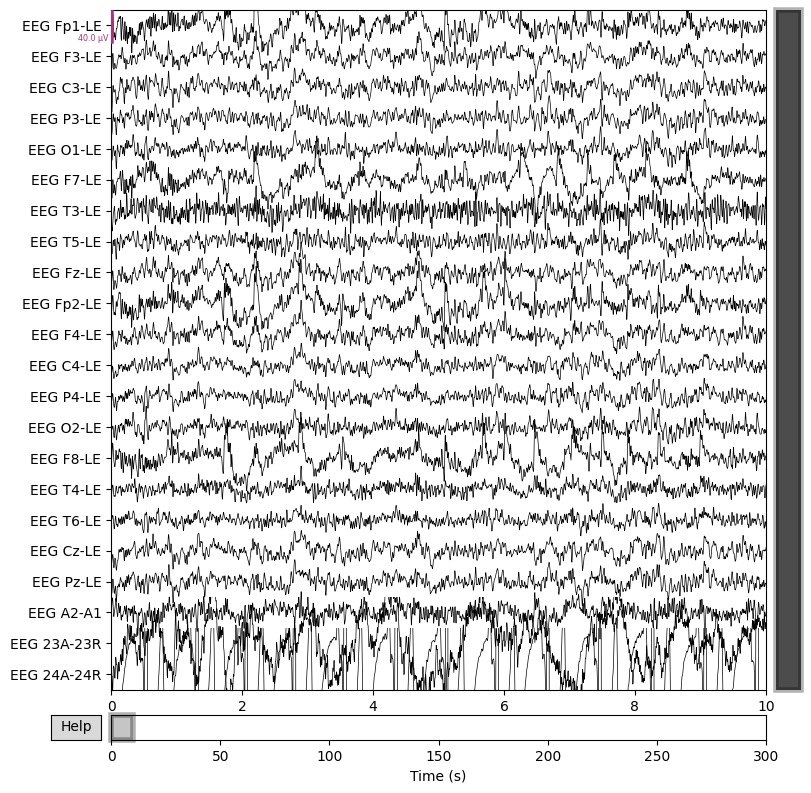

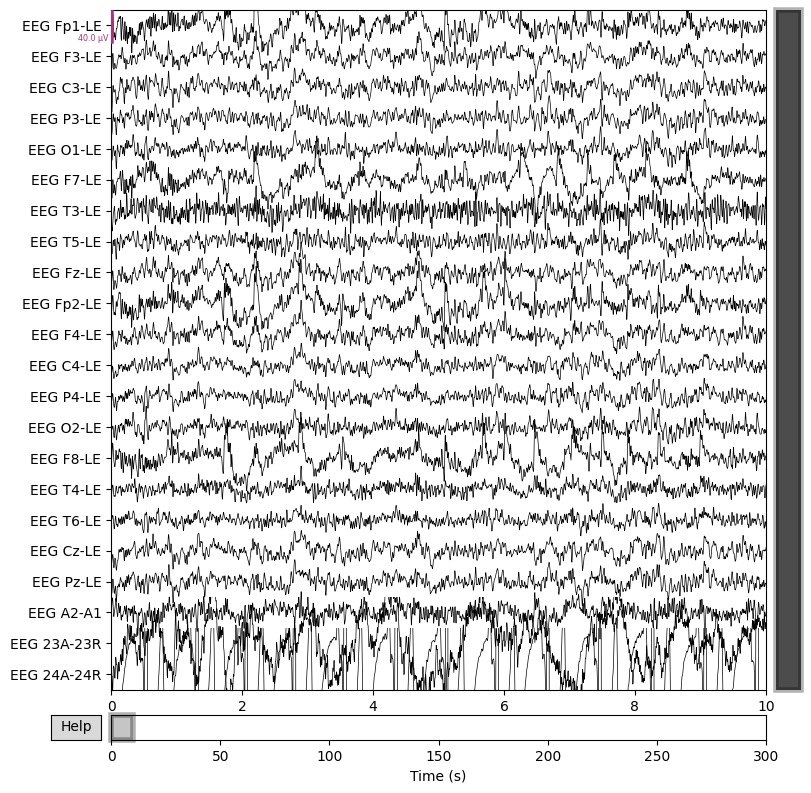

In [ ]:
# Viewing the plot of the data for initial read
test = mne.io.read_raw_edf("/content/drive/My Drive/Colab Notebooks/Depression Data/H S1 EC.edf",preload = True)
eeg_channels = mne.pick_types(test.info, eeg=True)
test.plot(order=eeg_channels, n_channels=len(eeg_channels))

#

# Low and High Filter

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


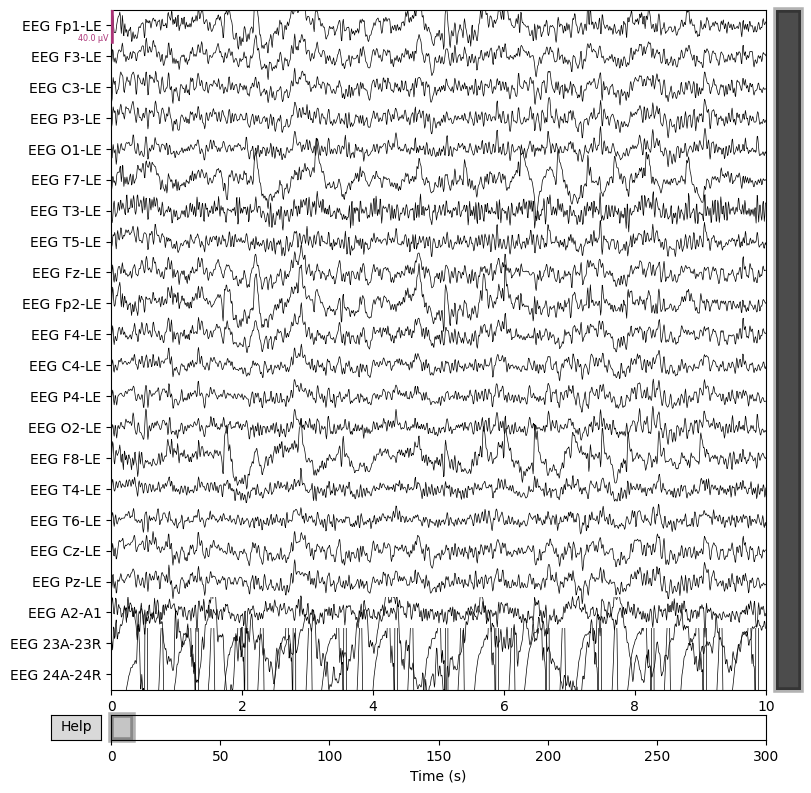

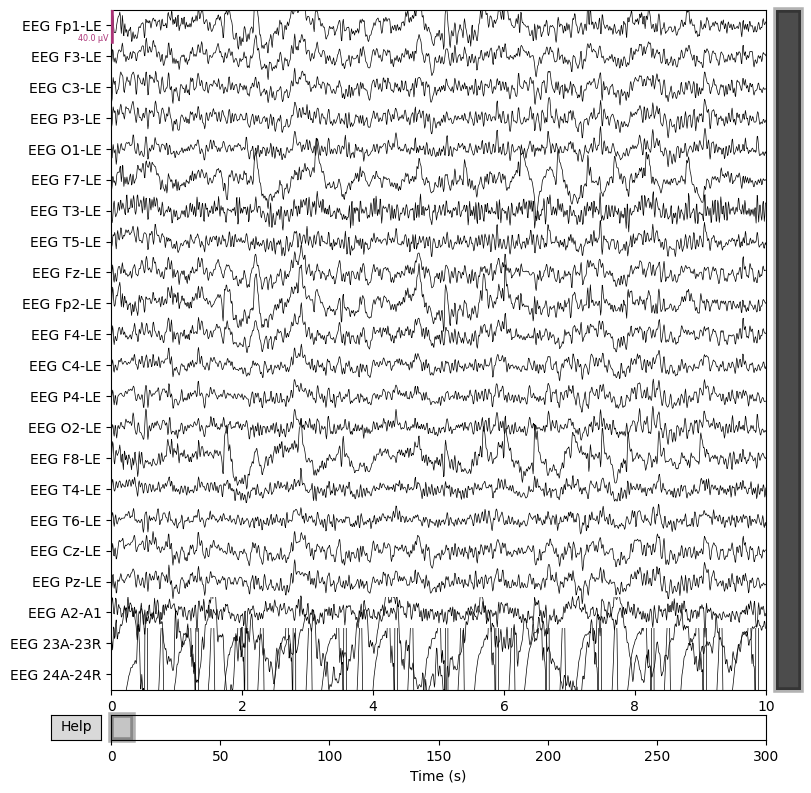

In [ ]:
# Filter test data to remove low and high frequency and visualise
test_filtered = test.copy().filter(l_freq=0.5, h_freq=30)
test_filtered.plot(order=eeg_channels, n_channels=len(eeg_channels))

# Bad Channel Interpolation

Setting channel interpolation method to {'eeg': 'spline'}.


<ipython-input-6-58f416e69540>:3: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  test_filtered.interpolate_bads(reset_bads=True)


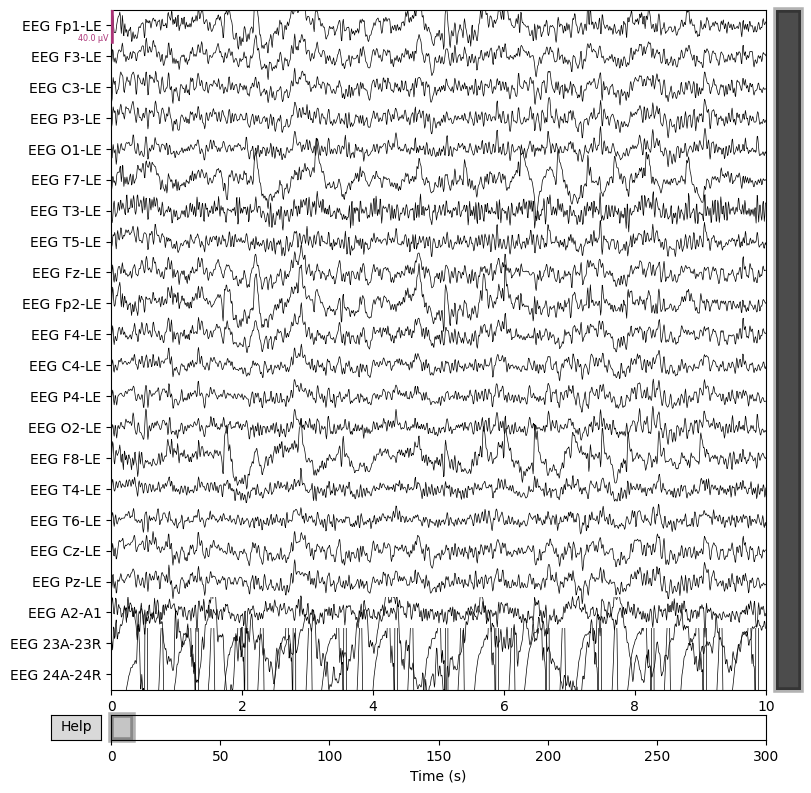

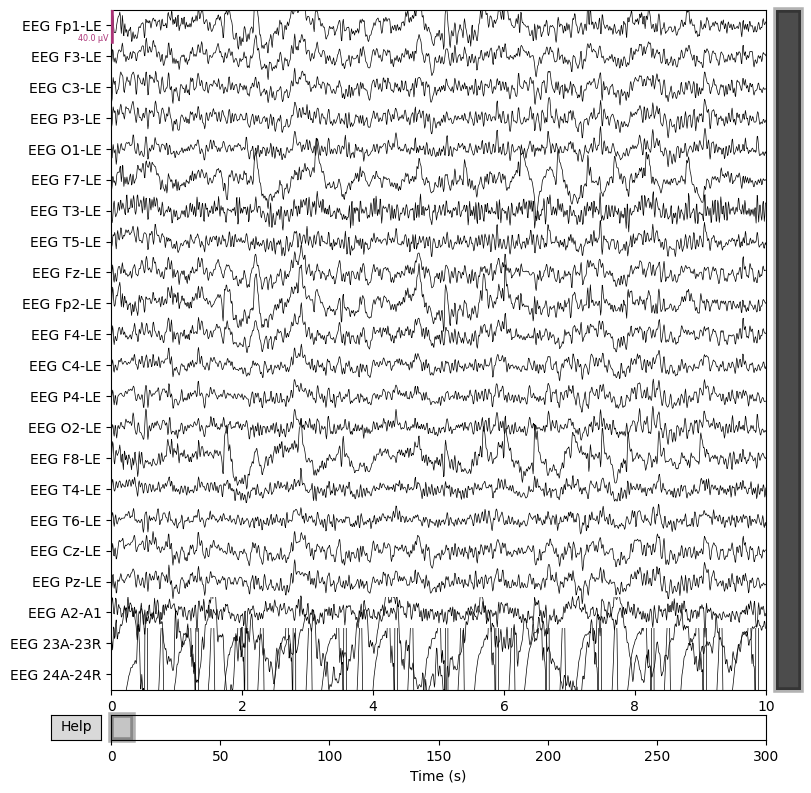

In [ ]:
# Detect and interpolate badd channels in test data
test_bad_channels = test_filtered.info['bads']
test_filtered.interpolate_bads(reset_bads=True)
test_filtered.plot(order=eeg_channels, n_channels=len(eeg_channels))

# Independent Component Analysis

Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 2.7s.
Creating RawArray with float64 data, n_channels=10, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   299.996 secs
Ready.


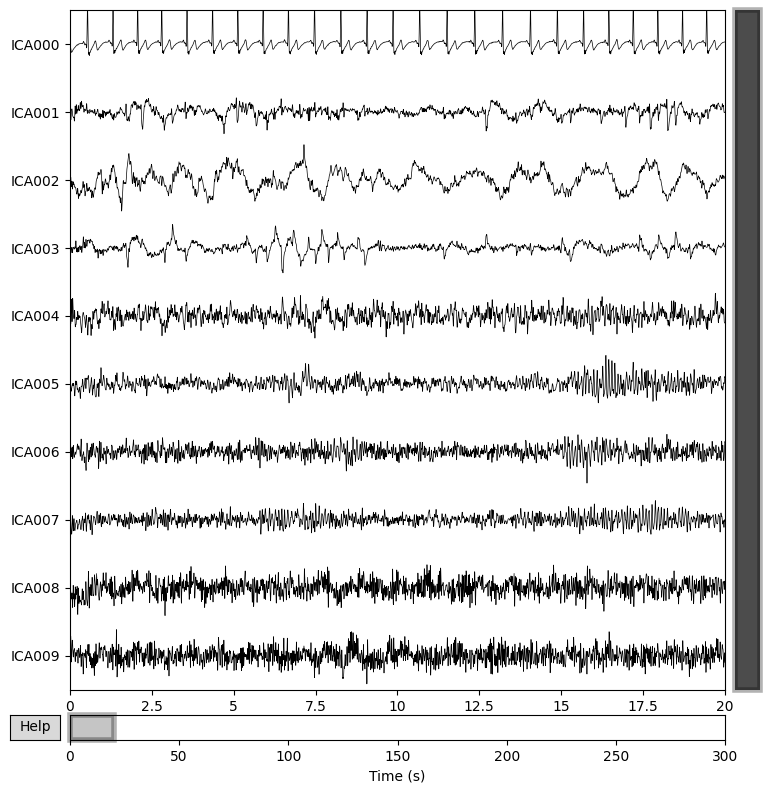

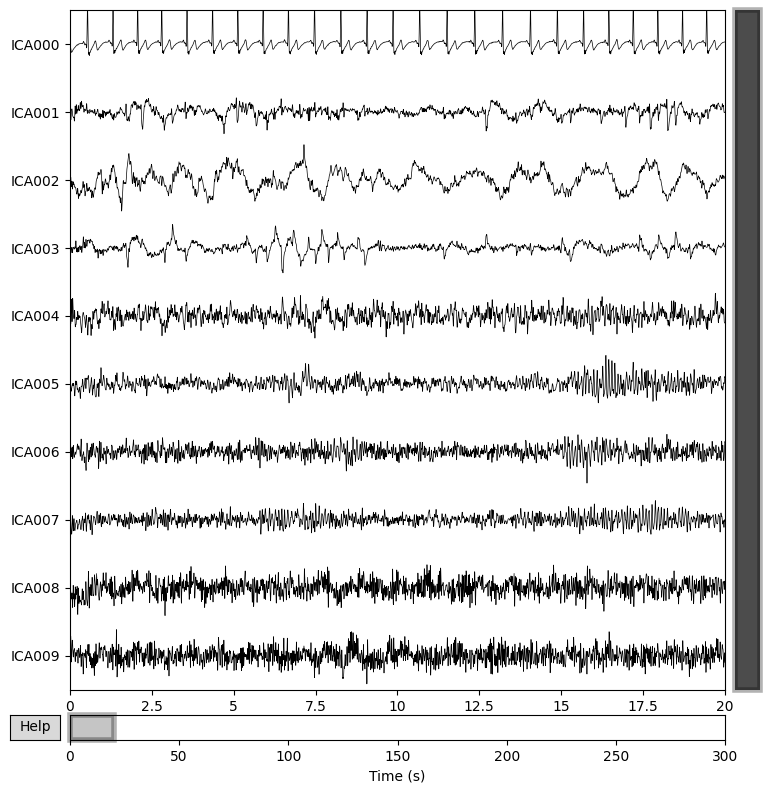

In [ ]:
# Apply ICA for artifact removal in test data and visualise
test_ica = mne.preprocessing.ICA(n_components=10, random_state=97)
test_ica.fit(test_filtered)
test_ica.plot_sources(test_filtered)

# Exclusion of Artifacts

In [ ]:
# Detect and exclude eye movement artifacts automatically if data available in test file then view
#eog_indices, eog_scores = test_ica.find_bads_eog(test_filtered)
#test_ica.exclude = eog_indices
#test_ica.plot_scores(eog_scores)

# Detect and excluded heart artifacts automatically if data available in test file then view
#ecg_indices, ecg_scores = test_ica.find_bads_ecg(test_filtered)
#test_ica.exclude = ecg_indices
#test_ica.plot_scores(ecg_scores)

# Creation of features and labels with processed data

In [ ]:
# Initialise lists for feature and label storage
features_processed = []
labels_processed = []

# Iterate over EEG data files
for file in edf_files:
    # Read EEG data from file as check for valid files
    raw = mne.io.read_raw_edf(file, preload=True)

    # Extract signals and channels into an array form
    n_channels = len(raw.ch_names) # Get number of channels
    signal_lbl = raw.ch_names # Get channel labels
    signals = raw.get_data() # Get signal data as NumPy array

    # Convert matrix into MNE raw object for processing
    meta = mne.create_info(ch_names=signal_lbl, sfreq=raw.info['sfreq'], ch_types='eeg')
    raw_object = mne.io.RawArray(signals, meta)

    # Filter all data to remove low and high frequency
    raw_object_filtered = raw_object.copy().filter(l_freq=0.5, h_freq=30)

    # Detect and interpolate bad channels in all data
    raw_object_bad_channels = raw_object_filtered.info['bads']
    raw_object_filtered.interpolate_bads(reset_bads=True)

    # Apply ICA for artifact removal to all data
    raw_object_ica = mne.preprocessing.ICA(n_components=10, random_state=97)
    raw_object_ica.fit(raw_object_filtered)

    # Apply ICA and get the processed data
    raw_object_cleaned = raw_object_ica.apply(raw_object_filtered)

    # Filter to extract Alpha (8 - 12 Hz)
    alpha_band = raw_object_cleaned.copy().filter(l_freq=8, h_freq=12)

    # Filter to extract Beta (13 - 30 Hz)
    beta_band = raw_object_cleaned.copy().filter(l_freq=13, h_freq=30)

    # Calculate power spectral density (PSD)
    psd_alpha = alpha_band.compute_psd(method='welch', tmin=10, tmax=20, fmin=0.5, fmax=30, picks=None)
    psd_beta = beta_band.compute_psd(method='welch', tmin=10, tmax=20, fmin=0.5, fmax=30, picks=None)
    psd_gen = raw_object_cleaned.compute_psd(method='welch', tmin=10, tmax=20, fmin=0.5, fmax=30, picks=None)

    # Extract the PSD values as NumPy arrays
    psd_alpha_values = psd_alpha.get_data()
    psd_beta_values = psd_beta.get_data()
    psd_gen_values = psd_gen.get_data()

    # Append features and labels
    features_processed.append([np.mean(psd_alpha_values), np.mean(psd_beta_values), np.mean(psd_gen_values)])

    # Add label based on file name
    if 'H' in file:
        labels_processed.append("Healthy")
    else:
        labels_processed.append("Depressed")

    raw.close()

# Convert to DataFrame for Algorithm
features_processed_df = pd.DataFrame(features_processed, columns=['Alpha PSD', 'Beta PSD', 'General PSD'])
labels_processed = np.array(labels_processed)

print(features_processed_df)

print(labels_processed)


Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Depression Data/6921143_H S15 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Creating RawArray with float64 data, n_channels=22, n_times=77312
    Range : 0 ... 77311 =      0.000 ...   301.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1691 samples (6.605 s)

Setting channel interpolation method to {'eeg': 'spline'}.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
<ipython-input-83-9aca8551224f>:24: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw_object_filtered.interpolate_bads(reset_bads=True)


KeyboardInterrupt: 

# Classifier Implementation


In [ ]:
print("Shape of features_df:", features_df.shape)
print("Shape of labels:", labels.shape)

# Train Raw Data Split
feature_train, feature_test, label_train, label_test = train_test_split(features_df, labels, test_size=0.2, random_state=42) #Note random_state is seed

# Transpose feature_train and feature_test
feature_train = np.transpose(feature_train)
#feature_test = np.transpose(feature_test)
print("Shape of features_train:", features_df.shape)
print("Shape of feature_test:", labels.shape)

# Normalise Raw features to prevent skewed scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_train_scaled = scaler.fit_transform(feature_train)
feature_test_scaled = scaler.transform(feature_test)

# See what is in the test, whether healthy and depressed is even
# Print the test split
print("Feature Test Set:")
print(feature_test)  # Prints the DataFrame containing the features in the test set

print("\nLabel Test Set:")
print(label_test)   # Prints the array (or Series) containing the labels in the test set

Shape of features_df: (175, 3)
Shape of labels: (175,)
Shape of features_train: (175, 3)
Shape of feature_test: (175,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: X has 3 features, but StandardScaler is expecting 140 features as input.

## Processed Data training

In [ ]:
# Train Processed Data Split
pfeature_train, pfeature_test, plabel_train, plabel_test = train_test_split(features_processed_df, labels_processed, test_size=0.2, random_state=42) #Note random_state is seed

# Normalise features to prevent skewed scales
from sklearn.preprocessing import StandardScaler
pscaler = StandardScaler()
pfeature_train_scaled = scaler.fit_transform(pfeature_train)
pfeature_test_scaled = scaler.transform(pfeature_test)


## Various Classifier Models

In [ ]:
# Parameter grid for GridSearch CV
#param_grid = {
    #'n_estimators': [100, 300, 500, 1000], # best result 500
    #'n_estimators': [500],
    #'criterion': ['gini', 'entropy'], # best result gini
    #'criterion': ['gini'],
    #'max_depth': [None, 5, 10, 100], # best result none
    #'max_depth': [None],
    #'min_samples_split': [2, 5, 10], # best result 2
    #'min_samples_split': [2],
    #'min_samples_leaf': [1, 2, 4], # best result 1
    #'min_samples_leaf': [1],
    #'max_features': ['sqrt', 'log2'], # best result sqrt
    #'max_features': ['sqrt'],
    #'class_weight': [None, 'balanced'], # best result none
    #'class_weight': [None],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.2], # best result 0.0
    #'min_weight_fraction_leaf': [0.0],
    #'max_leaf_nodes': [None, 10, 20], # best result none
    #'max_leaf_nodes': [None],
    #'min_impurity_decrease': [0.0, 0.1, 0.2], # best result 0.0
    #'min_impurity_decrease': [0.0],
    #'ccp_alpha': [0.0, 0.1, 0.2], # best result 0.1
    #'ccp_alpha': [0.1],
#}

### Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Random Forest Classifier Training Raw
rf_classifier = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    criterion = 'gini',
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_features = 'sqrt',
)

# Perform GridSearchCV
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(feature_train_scaled, label_train)

# Get best parameters and best model
# best_params = grid_search.best_params_
# best_rf_classifier = grid_search.best_estimator_

# print("Best parameters:", best_params)

# Make predictions using best model
rf_classifier.fit(feature_train_scaled, label_train)
rf_predictions = rf_classifier.predict(feature_test_scaled)
feature_importances = rf_classifier.feature_importances_

# Output results
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(label_test, rf_predictions))
print("Classification Report:\n", classification_report(label_test, rf_predictions))
for i, importance in enumerate(feature_importances):
    feature_name = features_df.columns[i]
    print(f"Feature {feature_name}: Importance = {importance}")
cv_scores = cross_val_score(rf_classifier, feature_train_scaled, label_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

# Investigate why some classes might not be predicted
print("Unique classes in test labels:", set(label_test))
print("Unique classes in predictions:", set(rf_predictions))
print("Class distribution in test set:", pd.Series(label_test).value_counts())
print("Class distribution in predictions:", pd.Series(rf_predictions).value_counts())

Random Forest Classifier:
Accuracy: 0.5714285714285714
Classification Report:
               precision    recall  f1-score   support

   Depressed       0.50      0.67      0.57        15
     Healthy       0.67      0.50      0.57        20

    accuracy                           0.57        35
   macro avg       0.58      0.58      0.57        35
weighted avg       0.60      0.57      0.57        35

Feature Alpha PSD: Importance = 0.3247969796292114
Feature Beta PSD: Importance = 0.3370633674847402
Feature General PSD: Importance = 0.33813965288604847
Cross-validation scores: [0.57142857 0.60714286 0.67857143 0.75       0.71428571]
Mean CV score: 0.6642857142857143
Unique classes in test labels: {'Depressed', 'Healthy'}
Unique classes in predictions: {'Depressed', 'Healthy'}
Class distribution in test set: Healthy      20
Depressed    15
Name: count, dtype: int64
Class distribution in predictions: Depressed    20
Healthy      15
Name: count, dtype: int64


In [ ]:
# Print out the input arrays before processing
print("Input feature array (pfeature_train) shape:", pfeature_train.shape)
print("First few rows of pfeature_train:")
print(pfeature_train[:5])  # Print first 5 rows

print("\nInput label array (plabel_train) shape:", plabel_train.shape)
print("First few elements of plabel_train:")
print(plabel_train[:5])  # Print first 5 elements

# Random Forest Classifier Training Processed
rf_classifier = RandomForestClassifier(n_estimators=500, criterion='gini',
                                       max_depth=None, min_samples_split=5,
                                       min_samples_leaf=2, min_weight_fraction_leaf=0.0,
                                       max_features='sqrt', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, bootstrap=True,
                                       oob_score=False, n_jobs=None, random_state=1,
                                       verbose=0, warm_start=False, class_weight=None,
                                       ccp_alpha=0.0, max_samples=None)
rf_classifier.fit(pfeature_train, plabel_train)

# Make predictions
prf_predictions = rf_classifier.predict(pfeature_test)
pfeature_importances = rf_classifier.feature_importances_
feature_shape = feature_train.shape
print(feature_shape)

# Output results
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(plabel_test, prf_predictions))
print("Classification Report:\n", classification_report(plabel_test, prf_predictions))
for i, importance in enumerate(pfeature_importances):
    pfeature_name = features_processed_df.columns[i]
    print(f"Feature {pfeature_name}: Importance = {importance}")


Input feature array (pfeature_train) shape: (140, 3)
First few rows of pfeature_train:
        Alpha PSD      Beta PSD   General PSD
118  8.843783e-14  2.846384e-13  8.099192e-13
143  1.666859e-13  5.419446e-13  1.673040e-12
164  1.547090e-13  5.651151e-13  3.524794e-12
38   4.435459e-13  2.815572e-13  4.126592e-12
135  4.475792e-13  3.175855e-13  6.272307e-12

Input label array (plabel_train) shape: (140,)
First few elements of plabel_train:
['Depressed' 'Depressed' 'Depressed' 'Healthy' 'Depressed']
(140, 3)
Random Forest Classifier:
Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

   Depressed       0.43      1.00      0.60        15
     Healthy       0.00      0.00      0.00        20

    accuracy                           0.43        35
   macro avg       0.21      0.50      0.30        35
weighted avg       0.18      0.43      0.26        35

Feature Alpha PSD: Importance = 0.0
Feature Beta PSD: Importance = 0.0
Featur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Support Vector Machine Training Raw
svm_classifier = SVC(kernel='rbf', random_state=42)  # You can experiment with different kernels
svm_classifier.fit(feature_train_scaled, label_train)

# Make predictions
svm_predictions = svm_classifier.predict(feature_test_scaled)

# Output results
print("Support Vector Machine Classifier:")
print("Accuracy:", accuracy_score(label_test, svm_predictions))
print("Classification Report:\n", classification_report(label_test, svm_predictions))


Support Vector Machine Classifier:
Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

   Depressed       0.43      1.00      0.60        15
     Healthy       0.00      0.00      0.00        20

    accuracy                           0.43        35
   macro avg       0.21      0.50      0.30        35
weighted avg       0.18      0.43      0.26        35



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Print out the input arrays before processing
print("Input feature array (pfeature_train) shape:", pfeature_train.shape)
print("First few rows of pfeature_train:")
print(pfeature_train[:5])  # Print first 5 rows

print("\nInput label array (plabel_train) shape:", plabel_train.shape)
print("First few elements of plabel_train:")
print(plabel_train[:5])  # Print first 5 elements

# K Nearest Neighbour Training Raw
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of k
knn_classifier.fit(feature_train_scaled, label_train)

# Make predictions
knn_predictions = knn_classifier.predict(feature_test_scaled)

# Output results
print("K Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_score(label_test, knn_predictions))
print("Classification Report:\n", classification_report(label_test, knn_predictions))


Input feature array (pfeature_train) shape: (140, 3)
First few rows of pfeature_train:
        Alpha PSD      Beta PSD   General PSD
118  8.843783e-14  2.846384e-13  8.099192e-13
143  1.666859e-13  5.419446e-13  1.673040e-12
164  1.547090e-13  5.651151e-13  3.524794e-12
38   4.435459e-13  2.815572e-13  4.126592e-12
135  4.475792e-13  3.175855e-13  6.272307e-12

Input label array (plabel_train) shape: (140,)
First few elements of plabel_train:
['Depressed' 'Depressed' 'Depressed' 'Healthy' 'Depressed']
K Nearest Neighbors Classifier:
Accuracy: 0.6571428571428571
Classification Report:
               precision    recall  f1-score   support

   Depressed       0.59      0.67      0.62        15
     Healthy       0.72      0.65      0.68        20

    accuracy                           0.66        35
   macro avg       0.66      0.66      0.65        35
weighted avg       0.66      0.66      0.66        35



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Training Raw
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(feature_train_scaled, label_train)

# Make predictions
logreg_predictions = logreg_classifier.predict(feature_test_scaled)

# Output results
print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_score(label_test, logreg_predictions))
print("Classification Report:\n", classification_report(label_test, logreg_predictions))


Logistic Regression Classifier:
Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

   Depressed       0.43      1.00      0.60        15
     Healthy       0.00      0.00      0.00        20

    accuracy                           0.43        35
   macro avg       0.21      0.50      0.30        35
weighted avg       0.18      0.43      0.26        35



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BCI Implementation


In [ ]:
!pip install pgmpy
from pgmpy.models import BayesianModel, BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Function to discretize data
def discretize(data, bins=3):
    return pd.cut(data, bins=bins, labels=[0, 1, 2])

# Load your data (replace this with your actual data loading code)
features_df = pd.DataFrame(np.random.rand(100, 3), columns=['Alpha PSD', 'Beta PSD', 'General PSD'])
labels_df = pd.DataFrame(np.random.randint(0, 2, 100), columns=['Label'])

data = pd.DataFrame({
    'Alpha_Power': features_df['Alpha PSD'],
    'Beta_Power': features_df['Beta PSD'],
    'PSD': features_df['General PSD'],
    'Depression': labels_df['Label']
})

# Discretize continuous variables
for col in ['Alpha_Power', 'Beta_Power', 'PSD']:
    data[col] = discretize(data[col])

# Check categories
for col in ['Alpha_Power', 'Beta_Power', 'PSD', 'Depression']:
    print(f"{col} categories:", data[col].unique())

# Create Bayesian Network
base_model = BayesianNetwork([('Alpha_Power', 'Depression'),
                              ('Beta_Power', 'Depression'),
                              ('PSD', 'Depression')])

# Learn the parameters of the Bayesian Network
try:
    mle = MaximumLikelihoodEstimator(base_model, data)

    # Estimate the parameters for each node and learn what they are
    for node in base_model.nodes():
        cpd = mle.estimate_cpd(node)
        base_model.add_cpds(cpd)
        print(f"Node: {node}")
        print(f"States: {base_model.get_cpds(node).state_names[node]}")
        print(cpd)
        print()

    # Check if the model is valid
    if not base_model.check_model():
        raise ValueError("The model is not valid.")

    # Perform inference
    infer = VariableElimination(base_model)

    # Discretized values for evidence
    evidence = {
        'Alpha_Power': discretize(pd.Series([0.5])).iloc[0],
        'Beta_Power': discretize(pd.Series([0.5])).iloc[0],
        'PSD': discretize(pd.Series([0.5])).iloc[0]
    }

    result = infer.query(['Depression'], evidence=evidence)

    # Print the results
    print("Inference Result:")
    print(result)

except Exception as e:
    print(f"An error occurred: {str(e)}")

Alpha_Power categories: [1, 2, 0]
Categories (3, int64): [0 < 1 < 2]
Beta_Power categories: [1, 0, 2]
Categories (3, int64): [0 < 1 < 2]
PSD categories: [0, 1, 2]
Categories (3, int64): [0 < 1 < 2]
Depression categories: [1 0]
Node: Alpha_Power
States: [0, 1, 2]
+----------------+------+
| Alpha_Power(0) | 0.31 |
+----------------+------+
| Alpha_Power(1) | 0.28 |
+----------------+------+
| Alpha_Power(2) | 0.41 |
+----------------+------+

Node: Depression
States: [0, 1]
+---------------+--------------------+-----+----------------+--------------------+
| Alpha_Power   | Alpha_Power(0)     | ... | Alpha_Power(2) | Alpha_Power(2)     |
+---------------+--------------------+-----+----------------+--------------------+
| Beta_Power    | Beta_Power(0)      | ... | Beta_Power(2)  | Beta_Power(2)      |
+---------------+--------------------+-----+----------------+--------------------+
| PSD           | PSD(0)             | ... | PSD(1)         | PSD(2)             |
+---------------+-------

# Visualisation and Output


<ipython-input-62-33dd686d2150>:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


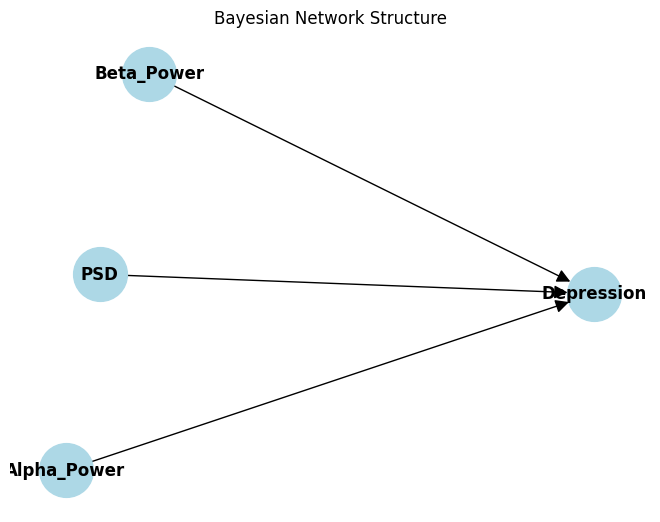

In [ ]:
!pip install networkx
import networkx as nx

# Create a directed graph using NetworkX
G = nx.DiGraph()
G.add_edges_from(base_model.edges())

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=1500, arrowsize=20, font_size=12, font_weight='bold')

# Add edge labels
edge_labels = {(u, v): '' for (u, v) in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Bayesian Network Structure")
plt.axis('off')
plt.tight_layout()
plt.show()